In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
#importing data sets that has already been preprocessed (null values have been dealt with)
trainData = pd.read_csv('trainWP.csv')
testData = pd.read_csv('testWP.csv')
trainData.head() #checking data upload with a visual ouput

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.999765,219.143373,16078.45939,7.652135,355.688892,282.502338,17.297556,65.065069,3.360131,1
1,8.575673,197.560283,15888.62521,4.865463,311.557381,464.725567,18.736927,40.224521,3.506229,0
2,3.433874,152.480075,16318.73361,5.973098,313.064317,412.915539,9.970144,68.507542,4.104938,0
3,8.376280,248.132861,27824.19048,7.100523,343.057975,433.449899,18.658886,53.303760,5.703963,0
4,6.920389,252.352799,11086.25986,9.993376,285.744758,368.629147,17.120803,43.667082,3.277601,0


In [3]:
#seperating inputs (x's) and outputs (y's) for test train data
xtrain = trainData.drop('Potability', axis=1)
ytrain = trainData['Potability']
xtest = testData.drop('Potability', axis=1)
ytest = testData['Potability']

In [4]:
#training model with training data
LogReg = LogisticRegression()
ypred = LogReg.fit(xtrain, ytrain).predict(xtest)

In [5]:
#number of mislabeled points gives an indication of accuracy
print("Number of mislabeled points out of a total", (xtest.shape[0]), "points : ",(ytest != ypred).sum())

Number of mislabeled points out of a total 656 points :  239


Model score: 0.64


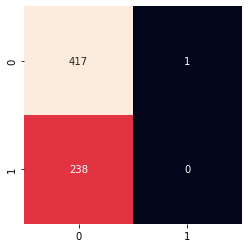

In [6]:
#scoring the model
print("Model score: %.2f" % LogReg.score(xtest,ytest))
#confusion matrix
confMat = confusion_matrix(ytest,ypred)
sns.heatmap(confMat, square=True, annot=True, fmt='d', cbar=False)
plt.show()

In [7]:
#prediction example
#Sample with:ph=6,hardness=200,Solids=1700,Chloramines=4,Sulfate=300,Conductivity=350,Organic_carbon=10,Trihalomethanes=50,Turbidity=4
#1=yes, potable, 0=no, not potable
LogReg.predict(np.array([[6,200,1700,4,300,350,10,50,4]]))[0]

0